<a href="https://colab.research.google.com/github/sathizz7/Guvi_Task_6/blob/main/Assignment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment8

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [32]:
df = pd.read_csv("car_data.csv")

In [33]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [34]:
df['Type'].unique()

array(['Sedan', 'Convertible', 'Hatchback', 'Coupe', 'Wagon'],
      dtype=object)

#Part_1

In [35]:
X = df.loc[:,['Mileage']]
y = df.loc[:,'Price']

In [36]:
X

,Mileage
0,8221
1,9135
2,13196
3,16342
4,19832
...,...
799,16229
800,19095
801,20484
802,25979


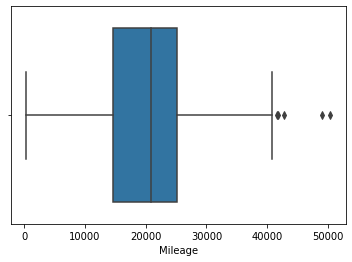

In [39]:
import seaborn as sns
sns.boxplot(df.loc[:,'Mileage'])

In [40]:
percentile25=df.Mileage.quantile(0.25)
percentile75=df.Mileage.quantile(0.75)
iqr=percentile75-percentile25
upper_limit=round(percentile75+1.5*iqr)
lower_limit=round(percentile25-1.5*iqr)
print(f"upper limit is {upper_limit} \n lower limit is {lower_limit}")

upper limit is 41097 
 lower limit is -1261


In [42]:
print("Number of outliers in mileage : ",df[df.Mileage>=upper_limit].shape[0])

Number of outliers in mileage :  5


In [43]:
data_without_outliers = df.loc[(df['Mileage'] > lower_limit) & (df['Mileage'] < upper_limit)]
data_without_outliers

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


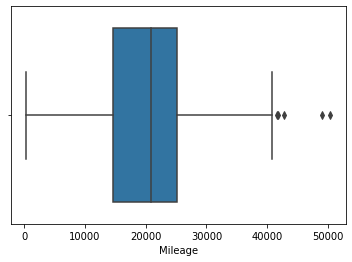

In [49]:
sns.boxplot(df['Mileage'])

Model

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lr = LinearRegression()

In [9]:
lr.fit(X,y)

LinearRegression()

In [10]:
print(lr.score(X, y))

0.02046344732348926


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
ypred = lr.predict(X)

In [13]:
print(lr.intercept_)

24764.559006061685


In [14]:
print(lr.coef_)

[-0.1725205]


In [15]:
print()

In [16]:
from sklearn.metrics import r2_score
r2_score(y,ypred)

0.02046344732348926

Text(0, 0.5, 'Price')

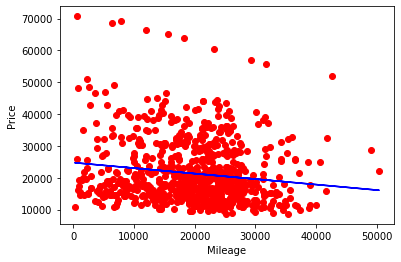

In [17]:
plt.scatter(X,y, color = 'r')
plt.plot(X, ypred, color = 'b')
plt.xlabel('Mileage')
plt.ylabel('Price')

In [18]:
from sklearn.preprocessing import PolynomialFeatures

In [19]:
from sklearn.pipeline import Pipeline

In [20]:
n= 6
lis = []

for degree in range(n):

  pf = PolynomialFeatures(degree = degree)
  X_poly = pf.fit_transform(X)
  lr = LinearRegression()
  lr = lr.fit(X_poly,y)

  model_score = lr.score(X_poly,y)
  lis.append(model_score)

In [21]:
lis

[0.0,
 0.02046344732348948,
 0.024681252371626772,
 0.0271218960199191,
 0.02716150708195253,
 0.027200555791939696]

#Part_2

In [22]:
lis = ['Price','Make','Model','Trim','Type']

In [23]:
df[lis]

,Price,Make,Model,Trim,Type
0,17314.103129,Buick,Century,Sedan 4D,Sedan
1,17542.036083,Buick,Century,Sedan 4D,Sedan
2,16218.847862,Buick,Century,Sedan 4D,Sedan
3,16336.913140,Buick,Century,Sedan 4D,Sedan
4,16339.170324,Buick,Century,Sedan 4D,Sedan
...,...,...,...,...,...
799,16507.070267,Saturn,L Series,L300 Sedan 4D,Sedan
800,16175.957604,Saturn,L Series,L300 Sedan 4D,Sedan
801,15731.132897,Saturn,L Series,L300 Sedan 4D,Sedan
802,15118.893228,Saturn,L Series,L300 Sedan 4D,Sedan


In [24]:
X = df.drop(df[lis],axis = 1)
y = df['Price']

In [25]:
y

0      17314.103129
1      17542.036083
2      16218.847862
3      16336.913140
4      16339.170324
           ...     
799    16507.070267
800    16175.957604
801    15731.132897
802    15118.893228
803    13585.636802
Name: Price, Length: 804, dtype: float64

In [26]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [27]:
print(lr.score(X,y))
print(lr.score(X,y))

0.4462643536728379
0.4462643536728379


In [28]:
print('intercept:', lr.intercept_)
print('coefficients:', lr.coef_)

intercept: 6758.755143598106
coefficients: [-1.69747832e-01  3.79237893e+03 -7.87220732e+02 -1.54274585e+03
  6.28899715e+03 -1.99379528e+03  3.34936162e+03]


In [29]:
print(lr.score(X,y))

0.4462643536728379


Combination of Factors

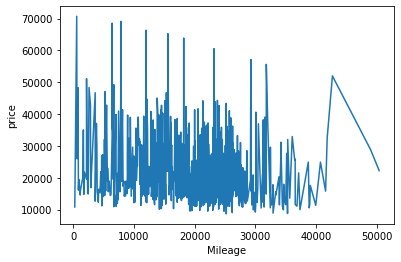

          Mileage     Price
Mileage  1.000000 -0.143051
Price   -0.143051  1.000000


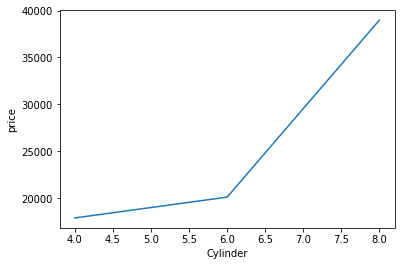

          Cylinder     Price
Cylinder  1.000000  0.569086
Price     0.569086  1.000000


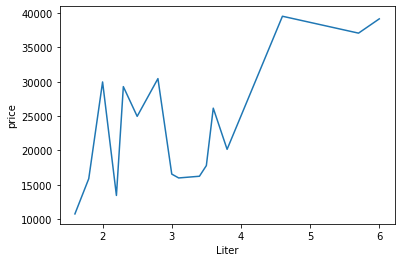

          Liter     Price
Liter  1.000000  0.558146
Price  0.558146  1.000000


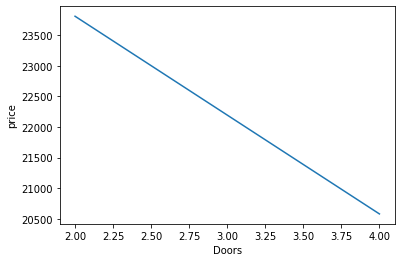

         Doors    Price
Doors  1.00000 -0.13875
Price -0.13875  1.00000


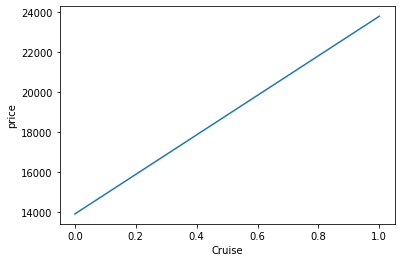

          Cruise     Price
Cruise  1.000000  0.430851
Price   0.430851  1.000000


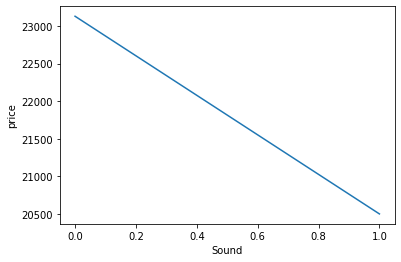

          Sound     Price
Sound  1.000000 -0.124348
Price -0.124348  1.000000


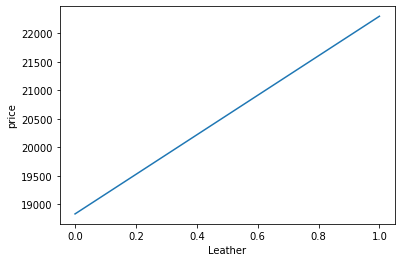

          Leather     Price
Leather  1.000000  0.157197
Price    0.157197  1.000000


In [50]:
def plotting_with_one_feature():
  for i in ('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'):
    df.groupby(df[i])['Price'].mean().plot()
    #plt.title(i,' vs Price')
    plt.xlabel(i)
    plt.ylabel('price')
    plt.show()
    print(df[[i,'Price']].corr())

plotting_with_one_feature()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


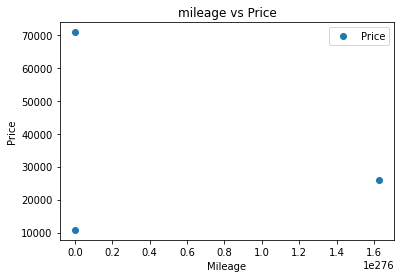

,Mileage,Price
Mileage,1.000000,-0.143051
Price,-0.143051,1.000000


In [51]:
df['transformed'] = np.exp(df['Mileage'])
df.plot(x='transformed', y='Price', style='o')
plt.title('mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()
df[['Mileage','Price']].corr()

#Task Hard Mode

In [52]:
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,transformed
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1,inf
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,inf
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,inf
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0,inf
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0,inf
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0,inf
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0,inf
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0,inf


In [53]:
df.Make.unique()

array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype=object)

In [54]:
df.Model.unique()

array(['Century', 'Lacrosse', 'Lesabre', 'Park Avenue', 'CST-V', 'CTS',
       'Deville', 'STS-V6', 'STS-V8', 'XLR-V8', 'AVEO', 'Cavalier',
       'Classic', 'Cobalt', 'Corvette', 'Impala', 'Malibu', 'Monte Carlo',
       'Bonneville', 'G6', 'Grand Am', 'Grand Prix', 'GTO', 'Sunfire',
       'Vibe', '9_3', '9_3 HO', '9_5', '9_5 HO', '9-2X AWD', 'Ion',
       'L Series'], dtype=object)

In [56]:
df.Type.unique()

array(['Sedan', 'Convertible', 'Hatchback', 'Coupe', 'Wagon'],
      dtype=object)